In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(training_data, training_labels), (test_data, test_labels)  = imdb.load_data(num_words=10000)

In [3]:
training_data.shape

(25000,)

In [4]:
training_labels.shape

(25000,)

In [5]:
test_data.shape

(25000,)

In [6]:
test_labels.shape

(25000,)

In [7]:
training_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
max([max(sequence) for sequence in training_data])

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in training_data[0]])

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
training_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [12]:
max([max(sequence) for sequence in test_data])

9999

In [13]:
max([max(sequence) for sequence in training_data])

9999

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=88586):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [15]:
x_train = vectorize_sequences(training_data)

In [16]:
x_test = vectorize_sequences(test_data)

In [17]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
len(x_train[0])

88586

In [19]:
len(training_labels)

25000

In [20]:
y_train = np.asarray(training_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [22]:
x_train.shape

(25000, 88586)

In [23]:
x_test.shape

(25000, 88586)

In [41]:
from keras import models

In [42]:
from keras import layers

In [43]:
model = models.Sequential()

In [44]:
model.add(layers.Dense(16, activation='relu', input_shape=(88586,)))

In [45]:
model.add(layers.Dense(16, activation = 'relu'))

In [46]:
model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
from keras import optimizers
from keras import losses
from keras import metrics

In [48]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [50]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [51]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 134s 9ms/step - loss: 0.5483 - binary_accuracy: 0.7713 - val_loss: 0.4351 - val_binary_accuracy: 0.8413
Epoch 2/20
15000/15000 [==============================] - 141s 9ms/step - loss: 0.3422 - binary_accuracy: 0.8967 - val_loss: 0.3236 - val_binary_accuracy: 0.8866
Epoch 3/20
15000/15000 [==============================] - 101s 7ms/step - loss: 0.2453 - binary_accuracy: 0.9243 - val_loss: 0.3040 - val_binary_accuracy: 0.8795
Epoch 4/20
15000/15000 [==============================] - 110s 7ms/step - loss: 0.1896 - binary_accuracy: 0.9410 - val_loss: 0.2785 - val_binary_accuracy: 0.8890
Epoch 5/20
15000/15000 [==============================] - 100s 7ms/step - loss: 0.1527 - binary_accuracy: 0.9539 - val_loss: 0.2738 - val_binary_accuracy: 0.8897
Epoch 6/20
15000/15000 [==============================] - 102s 7ms/step - loss: 0.1244 - binary_accuracy: 0.9632 - val_loss: 0.3043 - val_bi

In [52]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

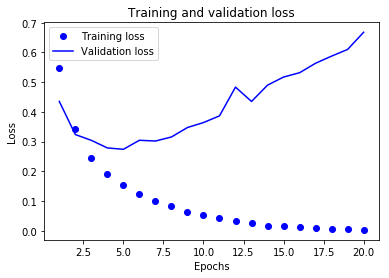

In [56]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['binary_accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

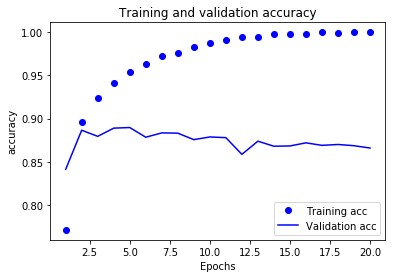

In [58]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [59]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(88586,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 39s 2ms/step - loss: 0.4731 - acc: 0.8365
Epoch 2/4
25000/25000 [==============================] - 39s 2ms/step - loss: 0.2661 - acc: 0.9107
Epoch 3/4
25000/25000 [==============================] - 39s 2ms/step - loss: 0.2001 - acc: 0.9303
Epoch 4/4
25000/25000 [==============================] - 44s 2ms/step


In [60]:
model.predict(x_test)

array([[0.13051005],
       [0.9997453 ],
       [0.39112478],
       ...,
       [0.07928094],
       [0.04868243],
       [0.48007578]], dtype=float32)